In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [141]:
dt=pd.read_excel('data-sell4all.xlsx')

In [142]:
dt

,Pays,Age,Genre,Dépenses des clients
0,France,32,Female,150.50
1,Germany,45,Male,200.75
2,Spain,28,Female,75.25
3,Italy,39,Male,180.00
4,UK,52,Female,250.30
...,...,...,...,...
60,Digital Realm,NaN,AI,1010101.01
61,Multiverse,∞,Non-Binary,π
62,Error,NaN,404,NaN
63,"Greece, Italy",25;30,Male;Female,100+200


In [143]:
dt.to_csv('data-sell4all.csv',index=False)

In [144]:
dt

,Pays,Age,Genre,Dépenses des clients
0,France,32,Female,150.50
1,Germany,45,Male,200.75
2,Spain,28,Female,75.25
3,Italy,39,Male,180.00
4,UK,52,Female,250.30
...,...,...,...,...
60,Digital Realm,NaN,AI,1010101.01
61,Multiverse,∞,Non-Binary,π
62,Error,NaN,404,NaN
63,"Greece, Italy",25;30,Male;Female,100+200


In [145]:
#explorer les données disponibles
print(dt.info())
print(dt.describe())
print(dt.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pays                  65 non-null     object
 1    Age                  62 non-null     object
 2   Genre                 64 non-null     object
 3   Dépenses des clients  63 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB
None
          Pays   Age    Genre Dépenses des clients
count       65     62      64                   63
unique      20     40      12                   59
top     France     28  Female               195.25
freq        10      3      27                    2
Index(['Pays', ' Age ', 'Genre', 'Dépenses des clients'], dtype='object')


In [146]:
# Nettoyage des données

# pour nettoyer les noms des colonnes et supprimer les espaces autour des valeurs
dt.columns = dt.columns.str.strip()
dt = dt.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# pour convertir les colonnes en types appropriés et remplacer les valeurs non convertibles par NaN
dt['Age'] = pd.to_numeric(dt['Age'], errors='coerce')
dt['Dépenses des clients'] = pd.to_numeric(dt['Dépenses des clients'], errors='coerce')

# pour supprimer les lignes avec des valeurs nulles ou des âges négatifs
dt = dt.dropna()
dt = dt[dt['Age'] >= 0]
print("Données nettoyées :")
print(dt)

Données nettoyées :
         Pays     Age      Genre  Dépenses des clients
0      France    32.0     Female                150.50
1     Germany    45.0       Male                200.75
2       Spain    28.0     Female                 75.25
3       Italy    39.0       Male                180.00
4          UK    52.0     Female                250.30
5      France    22.0       Male                 90.00
6     Germany    36.0     Female                175.50
7       Spain    41.0       Male                120.75
8       Italy    29.0     Female                 95.25
9          UK    48.0       Male                220.00
10     France    35.0     Female                160.25
11    Germany    27.0       Male                 85.50
12      Spain    50.0     Female                190.75
13      Italy    33.0       Male                140.00
14         UK    44.0     Female                210.50
15     France    31.0       Male                130.25
16    Germany    38.0     Female             

In [147]:
#Afficher des informations sur les 5 premières lignes du fichier CSV?
dt.head()


,Pays,Age,Genre,Dépenses des clients
0,France,32.0,Female,150.50
1,Germany,45.0,Male,200.75
2,Spain,28.0,Female,75.25
3,Italy,39.0,Male,180.00
4,UK,52.0,Female,250.30


In [148]:
#Afficher un résumé technique des données disponibles dans le fichier CSV avec des
#informations telles que :
 #nombre de lignes
dt.shape[0] 

54

In [149]:
#les colonnes du fichier CSV
dt.columns

Index(['Pays', 'Age', 'Genre', 'Dépenses des clients'], dtype='object')

In [150]:
dt.columns.tolist()

['Pays', 'Age', 'Genre', 'Dépenses des clients']

In [151]:
#les types de données des champs du fichier CSV
dt.dtypes

Pays                     object
Age                     float64
Genre                    object
Dépenses des clients    float64
dtype: object

Un résumé technique des données a été effectué en utilisant les commandes `dt.info()`, `dt.describe()`, et `dt.columns`. Ces commandes fournissent un aperçu des caractéristiques des données, notamment le nombre de lignes, les noms de colonnes, et les types de données associés à chaque champ.

- Le DataFrame contient 65 lignes réparties sur 4 colonnes : `Pays`, `Age`, `Genre`, et `Dépenses des clients`.
- Les types de données des colonnes sont initialement des chaînes de caractères (`object`), ce qui peut nécessiter une conversion pour une analyse plus approfondie.
- `describe()` a révélé la distribution des valeurs dans les colonnes de type `object`, comme les valeurs uniques et les fréquences des valeurs les plus fréquentes.





In [152]:
#Calculer la médiane et la moyenne des colonnes :
#age_moyenne
dt.columns = dt.columns.str.strip()
dt.columns


Index(['Pays', 'Age', 'Genre', 'Dépenses des clients'], dtype='object')

In [153]:
#age_moyenne
dt['Age'].mean()


57.31481481481482

In [154]:
#age_median
dt['Age'].median()

36.5

In [155]:
#« Dépenses des clients »_moyenne
dt['Dépenses des clients'].mean()



159.95944444444447

In [156]:
#« Dépenses des clients »_median
dt['Dépenses des clients'].median()

162.625

# Partie 2

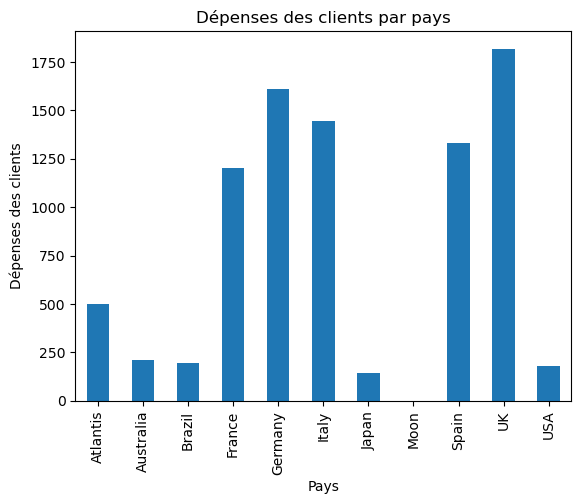

In [165]:
dt.groupby('Pays')['Dépenses des clients'].sum().plot(kind='bar')
plt.title('Dépenses des clients par pays')
# axe des x
plt.xlabel('Pays')
# axe des y
plt.ylabel('Dépenses des clients')
plt.show()

In [159]:
#Nettoyer les lignes avec moins de 10 € de dépenses client : supprimez toutes les
#lignes d’utilisateurs ayant dépensé moins de 10 € sur le site,
data_cleaned = dt[dt['Dépenses des clients'] >= 10]
data_cleaned

,Pays,Age,Genre,Dépenses des clients
0,France,32.0,Female,150.50
1,Germany,45.0,Male,200.75
2,Spain,28.0,Female,75.25
3,Italy,39.0,Male,180.00
4,UK,52.0,Female,250.30
5,France,22.0,Male,90.00
6,Germany,36.0,Female,175.50
7,Spain,41.0,Male,120.75
8,Italy,29.0,Female,95.25
9,UK,48.0,Male,220.00


In [160]:
dt.shape[0]

54

In [161]:
#Nettoyer les doublons : supprimer toutes les lignes qui apparaissent plus d’une fois
#dans les données,
data_db = data_cleaned.drop_duplicates()
data_db


,Pays,Age,Genre,Dépenses des clients
0,France,32.0,Female,150.50
1,Germany,45.0,Male,200.75
2,Spain,28.0,Female,75.25
3,Italy,39.0,Male,180.00
4,UK,52.0,Female,250.30
5,France,22.0,Male,90.00
6,Germany,36.0,Female,175.50
7,Spain,41.0,Male,120.75
8,Italy,29.0,Female,95.25
9,UK,48.0,Male,220.00


In [162]:
data_db.shape[0]

52

In [163]:
colonnes_desees = ['Pays', 'Age', 'Genre', 'Dépenses des clients']
data_db = data_db[colonnes_desees]

# un nouveau fichier CSV
data_db.to_csv('donnees_nettoyees.csv',index=False)

In [164]:
nv_data=pd.read_csv('donnees_nettoyees.csv')
nv_data

,Pays,Age,Genre,Dépenses des clients
0,France,32.0,Female,150.50
1,Germany,45.0,Male,200.75
2,Spain,28.0,Female,75.25
3,Italy,39.0,Male,180.00
4,UK,52.0,Female,250.30
5,France,22.0,Male,90.00
6,Germany,36.0,Female,175.50
7,Spain,41.0,Male,120.75
8,Italy,29.0,Female,95.25
9,UK,48.0,Male,220.00
